In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import yaml
import pandas as pd

In [2]:
import os
os.getcwd() 

'/home/singh16/work/hespas/scale-sim-v3/rundir-accelergy'

# Pre-defined funciton

In [9]:
def extract_area_breakdown(acclg_A):
    area_components = acclg_A['ART']['tables']
    area_breakdown = {}
    glb_count = 0
    spad_count = 0
    mac_count = 0
    dram_count = 0

    for ec in area_components:
        skip_rest = False

        # check glb (pJ)
        for glb in ['ifmap_glb', 'weights_glb', 'psum_glb']:
            if glb in ec['name']:
                assert (glb not in area_breakdown)
                glb_count += 1
                area_breakdown[glb] = ec['area']
                skip_rest = True
                break
        if skip_rest: continue

        # check spad (pJ)
        for spad in ['ifmap_spad', 'weights_spad', 'psum_spad']:
            if spad in ec['name']:
                spad_count += 1
                if spad not in area_breakdown:
                    area_breakdown[spad] = ec['area']
                else:
                    area_breakdown[spad] = area_breakdown[spad] + ec['area']
                skip_rest = True
   
                break
        if skip_rest: continue

        # check mac (pJ)
        if 'mac' in ec['name']:
            mac_count += 1
            if 'mac' not in area_breakdown:
                area_breakdown['mac'] = ec['area']
            else:
                area_breakdown['mac'] = area_breakdown['mac'] + ec['area']
        if skip_rest: continue

        # check dram (nJ)
        for dram in ['ifmap_dram', 'weights_dram', 'psum_dram']:
            if dram in ec['name']:
                assert (dram not in area_breakdown)
                dram_count += 1
                area_breakdown[dram] = ec['area'] * 1000
                skip_rest = True
                break

    return area_breakdown

def extract_energy_breakdown(acclg_E):
    energy_components = acclg_E['energy_estimation']['components']

    energy_breakdown= {}
    glb_count = 0
    spad_count = 0
    mac_count = 0
    dram_count = 0

    for ec in energy_components:
        skip_rest = False

        # check glb (pJ)
        for glb in ['ifmap_glb', 'weights_glb', 'psum_glb']:
            if glb in ec['name']:
                assert (glb not in energy_breakdown)
                glb_count += 1
                energy_breakdown[glb] = ec['energy']
                skip_rest = True
                break
        if skip_rest: continue

        # check spad (pJ)
        for spad in ['ifmap_spad', 'weights_spad', 'psum_spad']:
            if spad in ec['name']:
                spad_count += 1
                if spad not in energy_breakdown:
                    energy_breakdown[spad] = ec['energy']
                else:
                    energy_breakdown[spad] = energy_breakdown[spad] + ec['energy']
                skip_rest = True
   
                break
        if skip_rest: continue

        # check mac (pJ)
        if 'mac' in ec['name']:
            mac_count += 1
            if 'mac' not in energy_breakdown:
                energy_breakdown['mac'] = ec['energy']
            else:
                energy_breakdown['mac'] = energy_breakdown['mac'] + ec['energy']
        if skip_rest: continue

        # check dram (nJ)
        for dram in ['ifmap_dram', 'weights_dram', 'psum_dram']:
            if dram in ec['name']:
                assert (dram not in energy_breakdown)
                dram_count += 1
                energy_breakdown[dram] = ec['energy'] * 1000
                skip_rest = True
                break

    return energy_breakdown

# Single Run 

In [12]:
### CHANGE THE RUN NAME (from scale.cfg) ###
run_name = "scale_example_run_32x32_ws"
acclg_energy_file = "./accelergy_output/"+ run_name+"/energy_estimation.yaml"
acclg_area_file = "./accelergy_output/"+ run_name+"/ART.yaml"
scsim_outdir = "./output/scale_sim_output_"+run_name+"/COMPUTE_REPORT.csv"
############################################


# Load accelergy_energy results
with open(acclg_energy_file, 'r') as fr:
    acclg_E = yaml.safe_load(fr)

# Load accelergy_energy results
with open(acclg_area_file, 'r') as fr:
    acclg_A = yaml.safe_load(fr)

# Load scale-sim results
csv_filename = scsim_outdir
scsim_P = pd.read_csv(csv_filename, sep=r'\s*,\s*', engine='python')
energy_breakdown_32x32_os = extract_energy_breakdown(acclg_E)
area_breakdown_32x32_os = extract_area_breakdown(acclg_A)

eelayer_utilization = (scsim_P['Compute Util %']).values.tolist()
layer_runtime = scsim_P['Total Cycles'].values.tolist()

print("Energy Breakdown:", energy_breakdown_32x32_os)
print("Area Breakdown:", area_breakdown_32x32_os)


Energy Breakdown: {'ifmap_dram': 13019207168000.0, 'weights_dram': 4058934272000.0, 'psum_dram': 14230505216000.0, 'ifmap_glb': 424913943.405257, 'weights_glb': 178768844.65728, 'psum_glb': 53948270722.62894, 'weights_spad': 2354459.688, 'ifmap_spad': 15782841.648000242, 'psum_spad': 16009238.016000278, 'mac': 44126714419.200264}
Area Breakdown: {'mac': 6628.0, 'ifmap_spad': 5.98, 'weights_spad': 5.98, 'psum_spad': 5.98, 'weights_glb': 2961070.0, 'ifmap_glb': 2961070.0, 'psum_glb': 2961070.0, 'weights_dram': 0.0, 'ifmap_dram': 0.0, 'psum_dram': 0.0}


ifmap_dram 13019207.168
weights_dram 4058934.272
psum_dram 14230505.216
ifmap_glb 424.913943405257
weights_glb 178.76884465728
psum_glb 53948.270722628935
weights_spad 2.354459688
ifmap_spad 15.782841648000241
psum_spad 16.00923801600028
mac 44126.71441920027


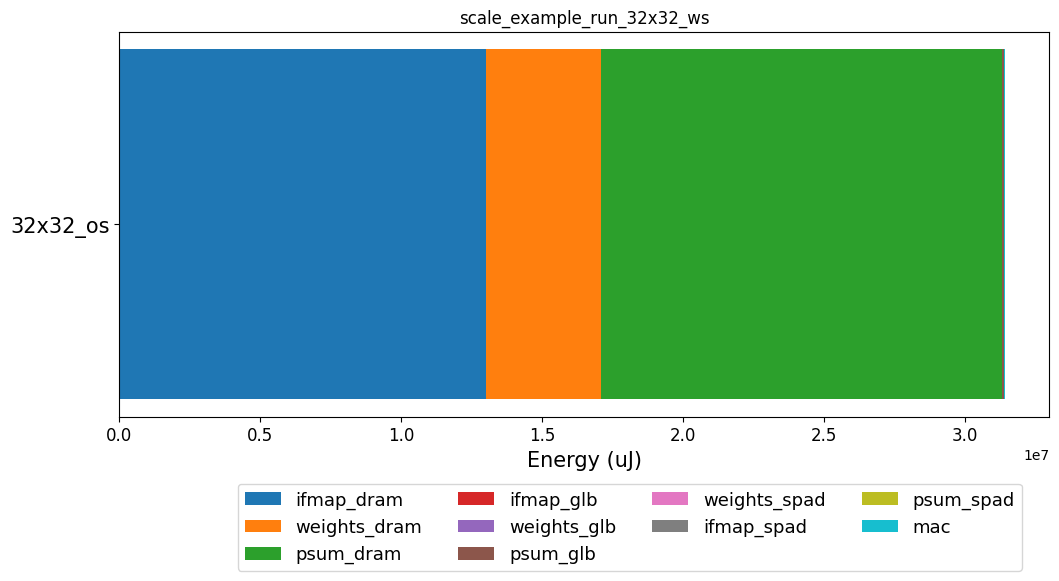

Runtime for each layer (cycles) [77111]
Utilizations for each layer (%) [16.666666666666664]


In [8]:
labels_32x32_os = []
values_32x32_os = []
for k,v in energy_breakdown_32x32_os.items():
    labels_32x32_os.append(k)
    values_32x32_os.append(v/1000000)
    print(k,v/1000000)

values = [list(x) for x in zip(values_32x32_os)]
    
ax = plt.figure(figsize=(12,5))
bar_plot = plt.barh(['32x32_os'], values[0])
left_coor = values[0]

for n in range(1,len(values)):
    plt.barh(['32x32_os'], values[n], left=left_coor)
    left_coor = [x1+x2 for x1,x2 in zip(left_coor, values[n])]
    
plt.title(run_name)    
plt.legend(labels_32x32_os, ncol=4, bbox_to_anchor=(0.98, -0.15), fontsize=13)
plt.xlabel('Energy (uJ)', fontsize=15)

plt.yticks(fontsize=15)
plt.xticks(fontsize=12)

plt.show()

print("Runtime for each layer (cycles)", layer_runtime)
print("Utilizations for each layer (%)", layer_utilization)

# For Report (Outdated, TO BE FIXED)

## Different Sizes


In [ ]:
# Load accelergy_energy estimator
with open("./output/accelergy_output/scale_resnet_conv_run_32x32_os/energy_estimation.yaml", 'r') as fr:
    acclg_E = yaml.safe_load(fr)

energy_breakdown_32x32_os = extract_energy_breakdown(acclg_E)

# Load accelergy_energy estimator
with open("./output/accelergy_output/scale_resnet_conv_run_64x64_os/energy_estimation.yaml", 'r') as fr:
    acclg_E = yaml.safe_load(fr)

energy_breakdown_64x64_os = extract_energy_breakdown(acclg_E)

# Load accelergy_energy estimator
with open("./output/accelergy_output/scale_resnet_conv_run_16x16_os/energy_estimation.yaml", 'r') as fr:
    acclg_E = yaml.safe_load(fr)

energy_breakdown_16x16_os = extract_energy_breakdown(acclg_E)



In [ ]:
labels_16x16_os = []
values_16x16_os = []
for k,v in energy_breakdown_16x16_os.items():
    labels_16x16_os.append(k)
    values_16x16_os.append(v/1000000)

labels_32x32_os = []
values_32x32_os = []
for k,v in energy_breakdown_32x32_os.items():
    labels_32x32_os.append(k)
    values_32x32_os.append(v/1000000)

labels_64x64_os = []
values_64x64_os = []
for k,v in energy_breakdown_64x64_os.items():
    labels_64x64_os.append(k)
    values_64x64_os.append(v/1000000)   

    
values = [list(x) for x in zip(values_16x16_os, values_32x32_os, values_64x64_os)]


ax = plt.figure(figsize=(10,5))
bar_plot = plt.barh(['16x16_os', '32x32_os', '64x64_os'], values[0])
left_coor = values[0]

for n in range(1,7):
    plt.barh(['16x16_os', '32x32_os', '64x64_os'], values[n], left=left_coor)
    left_coor = [x1+x2 for x1,x2 in zip(left_coor, values[n])]
    
    
plt.legend(labels_32x32_os, ncol=4, bbox_to_anchor=(0.98, -0.15), fontsize=13)
plt.xlabel('Energy (uJ)', fontsize=15)

plt.yticks(fontsize=15)
plt.xticks(fontsize=12)

plt.show()

## Different Dataflows

In [ ]:
# Load accelergy_energy estimator
with open("./output/accelergy_output/scale_resnet_conv_run_32x32_is/energy_estimation.yaml", 'r') as fr:
    acclg_E = yaml.safe_load(fr)

energy_breakdown_32x32_is = extract_energy_breakdown(acclg_E)

# Load accelergy_energy estimator
with open("./output/accelergy_output/scale_resnet_conv_run_32x32_ws/energy_estimation.yaml", 'r') as fr:
    acclg_E = yaml.safe_load(fr)

energy_breakdown_32x32_ws = extract_energy_breakdown(acclg_E)

# Load accelergy_energy estimator
with open("./output/accelergy_output/scale_resnet_conv_run_32x32_os/energy_estimation.yaml", 'r') as fr:
    acclg_E = yaml.safe_load(fr)

energy_breakdown_32x32_os = extract_energy_breakdown(acclg_E)

In [ ]:
labels_32x32_is = []
values_32x32_is = []
for k,v in energy_breakdown_32x32_is.items():
    labels_32x32_is.append(k)
    values_32x32_is.append(v/1000000)

labels_32x32_ws = []
values_32x32_ws = []
for k,v in energy_breakdown_32x32_ws.items():
    labels_32x32_ws.append(k)
    values_32x32_ws.append(v/1000000)

labels_32x32_os = []
values_32x32_os = []
for k,v in energy_breakdown_32x32_os.items():
    labels_32x32_os.append(k)
    values_32x32_os.append(v/1000000)
    
values = [list(x) for x in zip(values_32x32_is, values_32x32_ws, values_32x32_os)]


ax = plt.figure(figsize=(10,5))
bar_plot = plt.barh(['32x32_is', '32x32_ws', '32x32_os'], values[0])
left_coor = values[0]


for n in range(1,7):
    plt.barh(['32x32_is', '32x32_ws', '32x32_os'], values[n], left=left_coor)
    left_coor = [x1+x2 for x1,x2 in zip(left_coor, values[n])]

    
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)

plt.legend(labels_32x32_ws, ncol=4, bbox_to_anchor=(0.98, -0.15),fontsize=13)
plt.xlabel('Energy (uJ)', fontsize=15)
plt.show()